Importing the installed libraries

In [70]:
import os
import pandas as pd
import numpy as np
from pybaseball import pitching_stats

Specifying the start and end seasons we are getting our data from

In [71]:
START = 2002
END = 2023

Retrieving data of pitchers who have pitched at least 150 innings any season from 2002 to 2023.

In [72]:
pitching = pitching_stats(START,END,qual=150)
pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
86,60,2004,Randy Johnson,ARI,40,16,14,9.6,2.60,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,73,2002,Curt Schilling,ARI,35,23,7,9.3,3.23,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10954,2018,Jacob deGrom,NYM,30,10,9,9.0,1.70,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,1303,2011,Roy Halladay,PHI,34,19,6,8.7,2.35,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1943,2009,Zack Greinke,KCR,25,16,8,8.7,2.16,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,3200,2012,Ervin Santana,LAA,29,9,13,-0.8,5.16,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1825,7541,2013,Lucas Harrell,HOU,28,6,17,-0.9,5.86,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1832,4897,2010,Scott Kazmir,LAA,26,9,15,-1.0,5.94,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823,7059,2016,James Shields,- - -,34,6,19,-1.0,5.85,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Converts pitching to a .csv file and filters pitching

Lambda expression checks each group (which is grouped by IDfg) and collects all the dataframes with more than one row.

In [73]:
pitching.to_csv("pitching.csv")
pitching = pitching.groupby("IDfg", group_keys=False).filter(lambda x : x.shape[0] > 1)

Now you can see our current data

In [74]:
pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
86,60,2004,Randy Johnson,ARI,40,16,14,9.6,2.60,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,73,2002,Curt Schilling,ARI,35,23,7,9.3,3.23,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10954,2018,Jacob deGrom,NYM,30,10,9,9.0,1.70,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,1303,2011,Roy Halladay,PHI,34,19,6,8.7,2.35,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1943,2009,Zack Greinke,KCR,25,16,8,8.7,2.16,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,3200,2012,Ervin Santana,LAA,29,9,13,-0.8,5.16,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1825,7541,2013,Lucas Harrell,HOU,28,6,17,-0.9,5.86,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1832,4897,2010,Scott Kazmir,LAA,26,9,15,-1.0,5.94,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823,7059,2016,James Shields,- - -,34,6,19,-1.0,5.85,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
def next_season(player):
    player = player.sort_values("Season")
    player["Next_WAR"] = player["WAR"].shift(-1)
    return player

pitching = pitching.groupby("IDfg", group_keys=False).apply(next_season)

/var/folders/mw/yywz7wrj0zl33z62sc15lyb80000gn/T/ipykernel_5054/3603735273.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pitching = pitching.groupby("IDfg", group_keys=False).apply(next_season)


null_count prints all the columns and the number of null values within them

In [76]:
null_count = pitching.isnull().sum()
print(null_count)

IDfg            0
Season          0
Name            0
Team            0
Age             0
             ... 
Pitching+    1542
Stf+ FO      1681
Loc+ FO      1681
Pit+ FO      1681
Next_WAR      358
Length: 394, dtype: int64


Gathers all the columns where there are no null rows

In [77]:
complete_cols = list(pitching.columns[null_count == 0])
complete_cols

['IDfg',
 'Season',
 'Name',
 'Team',
 'Age',
 'W',
 'L',
 'WAR',
 'ERA',
 'G',
 'GS',
 'CG',
 'ShO',
 'SV',
 'BS',
 'IP',
 'TBF',
 'H',
 'R',
 'ER',
 'HR',
 'BB',
 'IBB',
 'HBP',
 'WP',
 'BK',
 'SO',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Balls',
 'Strikes',
 'Pitches',
 'RS',
 'IFH',
 'BU',
 'BUH',
 'K/9',
 'BB/9',
 'K/BB',
 'H/9',
 'HR/9',
 'AVG',
 'WHIP',
 'BABIP',
 'LOB%',
 'FIP',
 'GB/FB',
 'LD%',
 'GB%',
 'FB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'Starting',
 'Start-IP',
 'RAR',
 'Dollars',
 'tERA',
 'xFIP',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'inLI',
 'gmLI',
 'exLI',
 'Pulls',
 'WPA/LI',
 'Clutch',
 'FB% 2',
 'FBv',
 'wFB',
 'wFB/C',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone%',
 'F-Strike%',
 'SwStr%',
 'HLD',
 'SD',
 'MD',
 'ERA-',
 'FIP-',
 'xFIP-',
 'K%',
 'BB%',
 'SIERA',
 'RS/9',
 'E-F',
 'RA9-WAR',
 'BIP-Wins',
 'LOB-Wins',
 'FDP-Wins',
 'Age Rng',
 'K-BB%',
 'Pull%',
 'Cent%',
 'Oppo%',
 'Soft%',
 'Med%',
 'Hard%

Puts all the complete columns as well as the Next_WAR column that got removed (since some have null values due to possibility of a year being a player's last season).

In [78]:
pitching = pitching[complete_cols + ["Next_WAR"]].copy()
pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,Next_WAR
805,27,2002,Ramon Ortiz,ANA,29,15,9,1.6,3.77,32,...,101,93,106,79,106,97,0,0.139,0.256,0.8
1713,27,2003,Ramon Ortiz,ANA,30,16,13,0.8,5.20,32,...,99,108,94,109,98,99,0,0.152,0.238,0.3
1748,27,2005,Ramon Ortiz,CIN,32,9,11,0.3,5.36,30,...,110,103,80,80,104,104,0,0.147,0.243,0.2
1789,27,2006,Ramon Ortiz,WSN,33,11,16,0.2,5.57,33,...,100,106,91,97,102,96,0,0.148,0.231,NaN
301,40,2002,Jarrod Washburn,ANA,27,18,6,4.2,3.15,32,...,88,90,130,92,103,97,0,0.154,0.233,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,22250,2023,Logan Gilbert,SEA,26,13,7,3.1,3.73,32,...,104,97,97,81,104,103,543,0.149,0.271,NaN
539,23735,2021,Luis Garcia,HOU,24,11,8,3.1,3.48,30,...,98,104,98,108,97,101,413,0.163,0.297,2.0
749,23735,2022,Luis Garcia,HOU,25,15,8,2.0,3.72,28,...,106,88,107,104,95,106,438,0.157,0.287,NaN
358,25377,2022,Brady Singer,KCR,25,10,5,3.0,3.23,27,...,87,109,107,88,101,105,425,0.210,0.303,2.0


In [79]:
pitching.dtypes[pitching.dtypes == 'object']

Name       object
Team       object
Dollars    object
Age Rng    object
dtype: object

Removes all columns that are of the object datatype since they will not be useful for models input.

In [80]:
del pitching["Dollars"]
del pitching["Age Rng"]
del pitching["Team"]

pitching_full contains copy of cleaned pitching dataset and pitching now is filtered with all the null war rows removed

In [81]:
pitching_full = pitching.copy()
pitching = pitching.dropna()

In [82]:
pitching

,IDfg,Season,Name,Age,W,L,WAR,ERA,G,GS,...,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,Next_WAR
805,27,2002,Ramon Ortiz,29,15,9,1.6,3.77,32,32,...,101,93,106,79,106,97,0,0.139,0.256,0.8
1713,27,2003,Ramon Ortiz,30,16,13,0.8,5.20,32,32,...,99,108,94,109,98,99,0,0.152,0.238,0.3
1748,27,2005,Ramon Ortiz,32,9,11,0.3,5.36,30,30,...,110,103,80,80,104,104,0,0.147,0.243,0.2
301,40,2002,Jarrod Washburn,27,18,6,4.2,3.15,32,32,...,88,90,130,92,103,97,0,0.154,0.233,1.6
1333,40,2003,Jarrod Washburn,28,10,15,1.6,4.43,32,32,...,97,99,106,109,95,108,0,0.172,0.255,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,20633,2019,Yusei Kikuchi,28,6,11,0.2,5.46,32,32,...,98,88,119,107,98,100,549,0.163,0.251,1.1
1321,20633,2021,Yusei Kikuchi,30,7,9,1.1,4.41,29,29,...,99,111,86,69,106,106,436,0.164,0.288,2.4
330,22250,2022,Logan Gilbert,25,13,6,3.0,3.20,32,32,...,102,95,104,88,94,117,537,0.144,0.251,3.1
539,23735,2021,Luis Garcia,24,11,8,3.1,3.48,30,28,...,98,104,98,108,97,101,413,0.163,0.297,2.0


In [83]:
import matplotlib.pyplot as plt

Picks a random player and isolates that player's data in the player_data dataframe

In [84]:
random_player = np.random.choice(pitching["Name"].unique())
player_data = pitching[pitching["Name"] == random_player].sort_values(by="Season")
player_data

,IDfg,Season,Name,Age,W,L,WAR,ERA,G,GS,...,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,Next_WAR
871,3886,2008,Gavin Floyd,25,17,8,2.2,3.84,33,33,...,113,89,93,98,102,97,0,0.158,0.243,4.0
1052,3886,2009,Gavin Floyd,26,11,11,4.0,4.06,30,30,...,110,93,94,101,96,108,0,0.175,0.275,4.1
1064,3886,2010,Gavin Floyd,27,10,13,4.1,4.08,31,31,...,102,94,106,88,102,103,0,0.178,0.270,3.1
1287,3886,2011,Gavin Floyd,28,12,13,3.1,4.37,31,30,...,92,110,99,84,103,109,0,0.177,0.261,1.9


Shows a player's WAR over tracked seasons

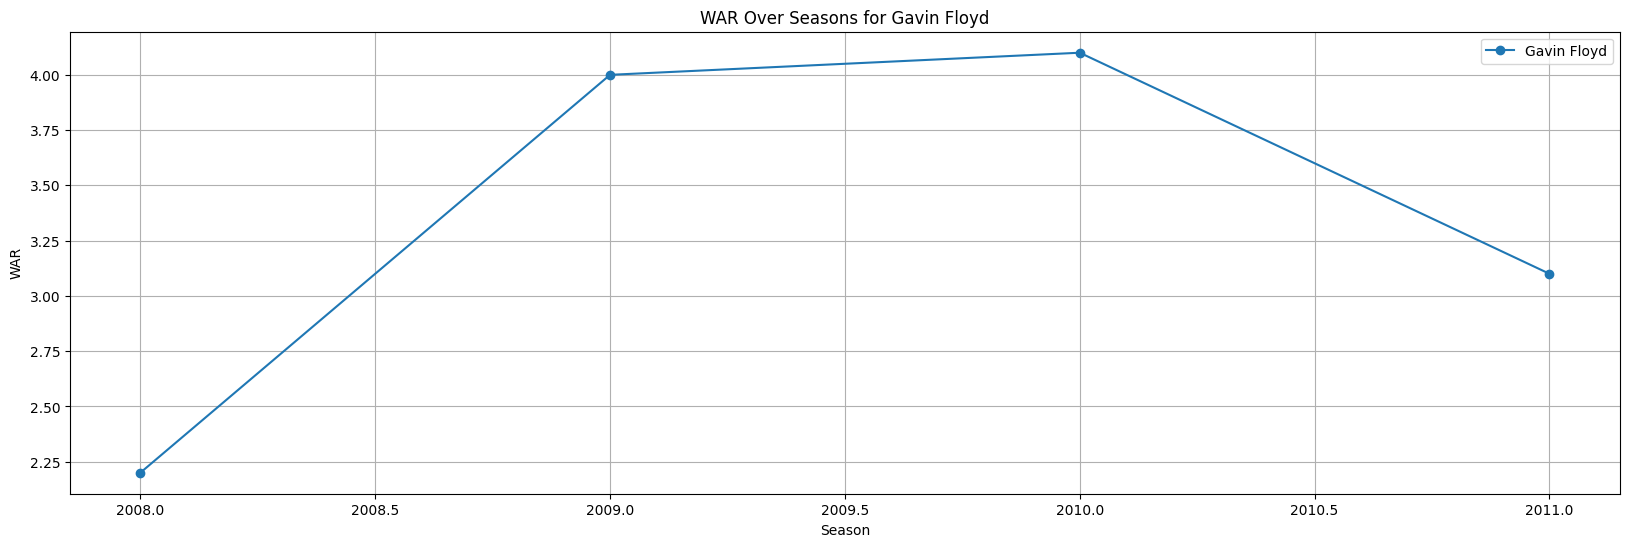

In [85]:
plt.figure(figsize=(20,6))
plt.plot(player_data["Season"], player_data["WAR"], marker="o", linestyle="-", label=random_player)

plt.xlabel("Season")
plt.ylabel("WAR")
plt.title(f"WAR Over Seasons for {random_player}")
plt.legend()
plt.grid(True)
plt.show()

Shows a player's WAR and ERA over tracked seasons

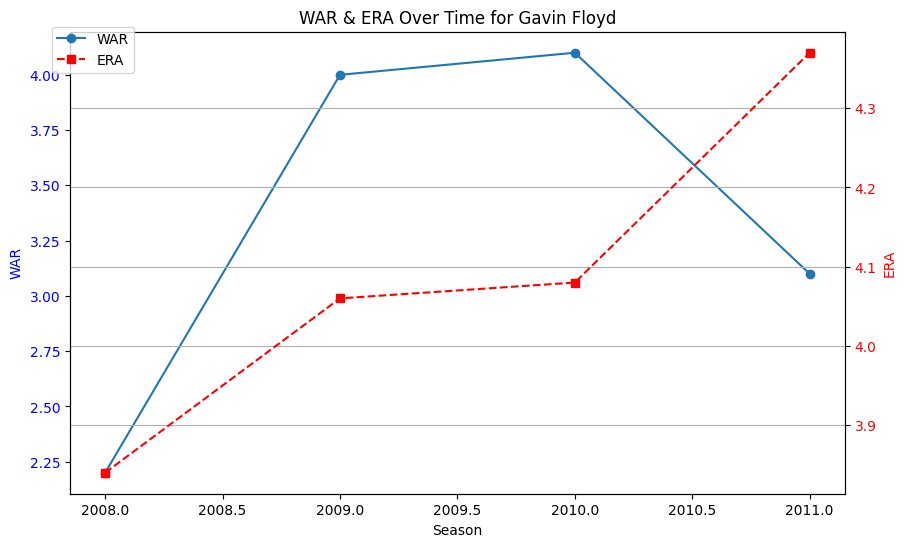

In [86]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(player_data["Season"], player_data["WAR"], marker="o", linestyle="-", label="WAR")
ax1.set_xlabel("Season")
ax1.set_ylabel("WAR", color="b")
ax1.tick_params(axis="y", labelcolor="b")

ax2 = ax1.twinx()
ax2.plot(player_data["Season"], player_data["ERA"], marker="s", linestyle="--", color="r", label="ERA")
ax2.set_ylabel("ERA", color="r")
ax2.tick_params(axis="y", labelcolor="r")

plt.title(f"WAR & ERA Over Time for {random_player}")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.grid(True)
plt.show()

In [87]:
X = pitching['ERA']
y = pitching['WAR']

from sklearn.model_selection import train_test_split

Linear Regression by hand

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_array = np.array(X_train)
y_array = np.array(y_train)

x_mean = np.mean(X_train)
y_mean = np.mean(y_train)

n_x = len(X_array)
n_y = len(y_array)

# slope calculation using math, not libraries

numerator = 0
denominator = 0

for i in range(n_x):
    numerator += (X_array[i] - x_mean)*(y_array[i] - y_mean)
    denominator += (X_array[i] - x_mean)**2

slope = numerator / denominator
print(f"Slope: {slope}")

intercept = y_mean - (slope * x_mean)
print(f"Intercept: {intercept}")

def predict_hand(x_val):
    return intercept + x_val * slope


Slope: -1.4292591291669972
Intercept: 8.618557499994257


In [ ]:
y_predicted = []

for i in range(n_x):
    y_predicted.append(predict_hand(X_array[i]))

Text(0.5, 0, 'ERA')

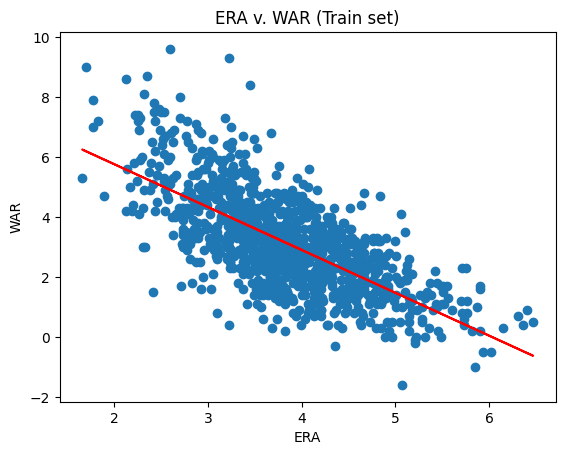

In [125]:
plt.scatter(X_train,y_train)
plt.plot(X_train, y_predicted,color="red")
plt.title("ERA v. WAR (Train set)")
plt.ylabel("WAR")
plt.xlabel("ERA")

In [129]:
from sklearn.metrics import r2_score

min_len = min(len(y),len(y_predicted))
print(f"Coefficient: {slope}")
print(f"Intercept: {intercept}")
print("R^2: ", r2_score(y_train,y_predicted))

Coefficient: -1.4292591291669972
Intercept: 8.618557499994257
R^2:  0.4757109751913927


Linear Regression using Sklearn library

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LinearRegression

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

X_test = pd.DataFrame(X_test)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

Text(0.5, 0, 'ERA')

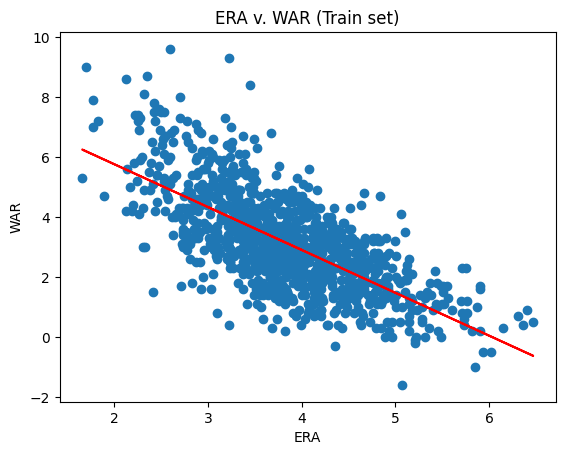

In [127]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred_train, color="red")
plt.title("ERA v. WAR (Train set)")
plt.ylabel("WAR")
plt.xlabel("ERA")

Text(0.5, 0, 'ERA')

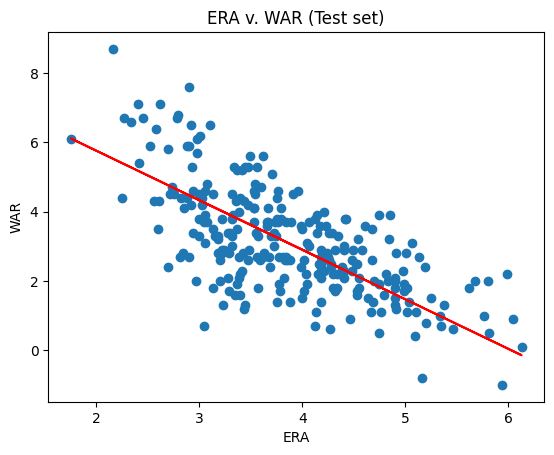

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,color="red")
plt.title("ERA v. WAR (Test set)")
plt.ylabel("WAR")
plt.xlabel("ERA")

In [ ]:
from sklearn.metrics import r2_score

min_len = min(len(y),len(y_pred_train))
print(f"Coefficient: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")
print("R^2: ", r2_score(y[:min_len],y_pred_train[:min_len]))

Coefficient: [[-1.42925913]]
Intercept: [8.6185575]
R^2:  -0.439334188814954
